In [1]:
import pandas as pd
import numpy as np
import pickle
from stargazer.stargazer import Stargazer

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [2]:
# import seaborn as sns
# sns.set_style("white")
# sns.set_palette("BrBG")

import matplotlib.pyplot as plt
hfont = {'fontname':'Helvetica'}

# sns.set()

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [3]:
#2019 только имена для определения перепоступивших
before_2019_1_1 = pd.read_excel("зачислено2019.xlsx")

#2018
before_2018_1_1 = pd.read_excel("зачисленные в 2018/Copy of Текущий рейтинг До пересдач 2018_19 1курс.xlsx")

#2017

before_2017_1_1 = pd.read_excel("зачисленные в 2017/Copy of До пересдач 1 семестр 2017_18 1 курс.xlsx")
after_2017_1_1 = pd.read_excel("зачисленные в 2017/Copy of После пересдач 1 семестр 2017_18 1 курс.xlsx")

before_2017_1_2 = pd.read_excel("зачисленные в 2017/Copy of До пересдач 2 семестр 2017_18 1 курс.xlsx")
after_2017_1_2 = pd.read_excel("зачисленные в 2017/Copy of После пересдач 2 семестр 2017_18 1 курс.xlsx")

before_2017_2_1 = pd.read_excel("зачисленные в 2017/Copy of Текущий рейтинг До пересдач 2018_19 2курс.xlsx")

#2016

before_2016_1_1 = pd.read_excel("зачисленные в 2016/Copy of До пересдач 1 семестр 2016_17 1 курс.xlsx")
after_2016_1_1 = pd.read_excel("зачисленные в 2016/Copy of После пересдач 1 семестр 2016_17 1 курс.xlsx")

before_2016_1_2 = pd.read_excel("зачисленные в 2016/Copy of До пересдач 2 семестр 2016_17 1 курс.xlsx")
after_2016_1_2 = pd.read_excel("зачисленные в 2016/Copy of После пересдач 2 семестр 2016_17 1 курс.xlsx")

before_2016_2_1 = pd.read_excel("зачисленные в 2016/Copy of До пересдач 1 семестр 2017_18 2 курс.xlsx")
after_2016_2_1 = pd.read_excel("зачисленные в 2016/Copy of После пересдач 1 семестр 2017_18 2 курс.xlsx")


#2015

before_2015_1_1 = pd.read_excel("зачисленные в 2015/Copy of Текущий рейтинг до пересдач 2015_16 1сем 1курс.xlsx")
after_2015_1_1 = pd.read_excel("зачисленные в 2015/Copy of Текущий рейтинг после пересдач 2015_16 1сем 1курс.xlsx")

before_2015_1_2 = pd.read_excel("зачисленные в 2015/Copy of Текущий рейтинг до пересдач 2015_16 2сем 1курс.xlsx")
after_2015_1_2 = pd.read_excel("зачисленные в 2015/Copy of Текущий рейтинг после пересдач 2015_16 2сем 1курс.xlsx")

before_2015_2_1 = pd.read_excel("зачисленные в 2015/Copy of До пересдач 1 семестр 2016_17 2 курс.xlsx")
after_2015_2_1 = pd.read_excel("зачисленные в 2015/Copy of После пересдач 1 семестр 2016_17 2 курс.xlsx")

Складываем колонки с оценками по майнору, чтобы у каждого была оценка только по своему предмету.

In [4]:
seconds = [before_2017_2_1, before_2016_2_1, before_2015_2_1]

for sem in seconds:
    filter_col = [col for col in sem if col.startswith('minor')]
    minor = sem[filter_col].sum(axis = 1)
    sem.drop(filter_col, axis = 1, inplace=True)
    sem.insert(6,"minor_2_1_before",minor)
    
seconds = [after_2016_2_1, after_2015_2_1]

for sem in seconds:
    filter_col = [col for col in sem if col.startswith('minor')]
    minor = sem[filter_col].sum(axis = 1)
    sem.drop(filter_col, axis = 1, inplace=True)
    sem.insert(6,"minor_2_1_after",minor)

Проверяем, есть ли люди, сменившие майнор (оценка получается > 10). В их случае берем среднее.

In [5]:
after_2015_2_1[after_2015_2_1['minor_2_1_after']>10]

,name,id,rank_2_1_after,avg_score_2_1_after,min_score_2_1_after,fails_2_1_after,minor_2_1_after,info_systems_after,calculus_3_after,programming_after


outer, чтобы держать в памяти отчислившихся

# СДЕЛАТЬ ВТОРОЙ КУРС

In [6]:
course_1_2018 = before_2018_1_1.copy()

In [7]:
sem1 = before_2017_1_1.merge(after_2017_1_1, how = "outer", on = "id")
sem2 = before_2017_1_2.merge(after_2017_1_2, how = "outer", on = "id")
course_1_2017 = sem1.merge(sem2, how = "outer", on = "id")

In [8]:
sem1 = before_2016_1_1.merge(after_2016_1_1, how = "outer", on = "id")
sem2 = before_2016_1_2.merge(after_2016_1_2, how = "outer", on = "id")
course_1_2016 = sem1.merge(sem2, how = "outer", on = "id")

In [9]:
sem1 = before_2015_1_1.merge(after_2015_1_1, how = "outer", on = "id")
sem2 = before_2015_1_2.merge(after_2015_1_2, how = "outer", on = "id")
course_1_2015 = sem1.merge(sem2, how = "outer", on = "id")

In [10]:
course_1_2018["enrol_year"] = 2018
course_1_2018 = course_1_2018.dropna(subset=['name'])
course_1_2017["enrol_year"] = 2017
course_1_2017 = course_1_2017.dropna(subset=['name_x_x'])
course_1_2016["enrol_year"] = 2016
course_1_2016 = course_1_2016.dropna(subset=['name_x_x'])
course_1_2015["enrol_year"] = 2015
course_1_2015 = course_1_2015.dropna(subset=['name_x_x'])

In [11]:
course_1_2015.rename(columns={"lin_alg_before_y": "lin_alg_before", "programming_before_y": "programming_before",
                             "lin_alg_after_y":"lin_alg_after","programming_after_y":"programming_after"},
                    inplace=True)

Определяем пол, удаляем имена

In [12]:
courses = [course_1_2018, course_1_2017, course_1_2016, course_1_2015]

for course in courses:
    gender = []
    for name in course.iloc[:,0]:
        name = name.strip().split(" ")
        gender.append(str(morph.parse(name[-1])[0].tag.gender))
    course.insert(2,"gender",gender)
    course.drop([col for col in course if col.startswith('name')], axis = 1, inplace=True)

In [13]:
course_1_2018[course_1_2018['gender']=="None"]

,id,gender,rank_1_1_before,avg_score_1_1_before,min_score_1_1_before,fails_1_1_before,safety_before,history_before,lin_alg_before,info_systems_before,calculus_1_before,phil_before,enrol_year
289,2589794685,None,0,0.0,0,Да,н/я,н/я,н/я,н/я,н/я,н/я,2018


In [14]:
first_year = pd.concat([course_1_2017, course_1_2016, course_1_2015], join="inner",ignore_index = True)
first_year.shape

(687, 41)

## Отчисленные 

Сохраняем id отчисленных

In [15]:
def anti_join(x, y, on):
    """Return rows in x which are not present in y"""
    ans = pd.merge(left=x, right=y, how='left', indicator=True, on=on)
    ans = ans.loc[ans._merge == 'left_only', :].drop(columns='_merge')
    return ans
#https://gist.github.com/sainathadapa/eb3303975196d15c73bac5b92d8a210f

In [16]:
dropouts = pd.DataFrame()

indexes = ["После пересдач 1 курс 1 семестр","До пересдач 1 курс 2 семестр","После пересдач 1 курс 2 семестр","До пересдач 2 курс 1 семестр"]
dropouts["indexes"] = indexes

dropout_time = ["dropout_after_1_1","dropout_before_1_2","dropout_after_1_2","dropout_before_2_1"]
dropouts["dropout_time"] = dropout_time

#dropouts.set_index("indexes", drop=True, inplace=True)

In [17]:
dict = {
    "2015":[before_2015_1_1,after_2015_1_1,before_2015_1_2,after_2015_1_2,before_2015_2_1],
    "2016":[before_2016_1_1,after_2016_1_1,before_2016_1_2,after_2016_1_2,before_2016_2_1],
    "2017":[before_2017_1_1,after_2017_1_1,before_2017_1_2,after_2017_1_2,before_2017_2_1]
}

for year,l in dict.items():
    lens = []
    for i in range(len(l)-1):
        ids = anti_join(l[i],l[i+1],"id")["id"].tolist()
        for j in range(len(first_year["id"])):
            if first_year.loc[j,"id"] in ids:
                first_year.loc[j,dropout_time[i]] = 1
        lens.append(len(ids))
    dropouts[year] = lens

In [18]:
dropouts.head(10)

,indexes,dropout_time,2015,2016,2017
0,После пересдач 1 курс 1 семестр,dropout_after_1_1,17,14,8
1,До пересдач 1 курс 2 семестр,dropout_before_1_2,12,14,13
2,После пересдач 1 курс 2 семестр,dropout_after_1_2,21,15,20
3,До пересдач 2 курс 1 семестр,dropout_before_2_1,1,9,2


In [19]:
pickle.dump(dropouts, open('dropouts.dat', 'wb'))

In [20]:
pickle.dump(first_year, open('first_year.dat', 'wb'))

Считываем из файла

In [21]:
dropouts = pd.read_pickle('dropouts.dat')

<Figure size 432x288 with 0 Axes>

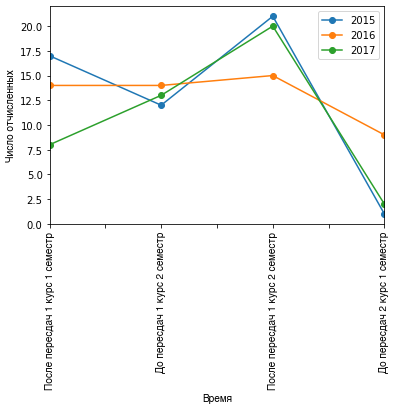

In [22]:
plt.figure()
dropouts.plot(x="indexes", y=["2015","2016","2017"], marker="o")
plt.xticks(rotation=90, **hfont)
plt.xlabel('Время',**hfont)
plt.ylabel('Число отчисленных',**hfont)
plt.savefig('dropouts_plot_2017.png', dpi=300, bbox_inches="tight")

## Добавление dummy и описательные статистики 

Читаем из файла:

In [23]:
first_year = pd.read_pickle('first_year.dat')

In [24]:
first_year.columns

Index(['id', 'gender', 'rank_1_1_before', 'avg_score_1_1_before',
       'min_score_1_1_before', 'fails_1_1_before', 'safety_before',
       'history_before', 'lin_alg_before', 'calculus_1_before',
       'economics_before', 'rank_1_1_after', 'avg_score_1_1_after',
       'min_score_1_1_after', 'fails_1_1_after', 'safety_after',
       'history_after', 'lin_alg_after', 'calculus_1_after', 'economics_after',
       'rank_1_2_before', 'avg_score_1_2_before', 'min_score_1_2_before',
       'fails_1_2_before', 'eng_before', 'discrete_math_before',
       'programming_before', 'project_sem_before', 'theor_info_before',
       'phil_before', 'rank_1_2_after', 'avg_score_1_2_after',
       'min_score_1_2_after', 'fails_1_2_after', 'eng_after',
       'discrete_math_after', 'programming_after', 'project_sem_after',
       'theor_info_after', 'phil_after', 'enrol_year', 'dropout_after_1_1',
       'dropout_before_1_2', 'dropout_after_1_2', 'dropout_before_2_1'],
      dtype='object')

для пола:

In [25]:
first_year.loc[first_year.gender == "femn", 'gender'] = 0
first_year.loc[first_year.gender != 0, 'gender'] = 1
first_year["gender"]

0      0
1      1
2      0
3      1
4      0
      ..
682    0
683    1
684    1
685    1
686    1
Name: gender, Length: 687, dtype: int64

для пересдач:

In [26]:
cols = ["fails_1_1_before","fails_1_1_after","fails_1_2_before","fails_1_2_after"]
first_year[cols] = first_year[cols].replace({np.nan:0, 'Да':1})
first_year[cols]

,fails_1_1_before,fails_1_1_after,fails_1_2_before,fails_1_2_after
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
5,0,0,0,0
6,0,0,0,0
7,0,0,0,0
8,0,0,0,0
9,0,0,0,0


для года зачисления:

In [27]:
enrol_year = first_year['enrol_year']
first_year = pd.get_dummies(first_year, columns=['enrol_year'])
first_year['enrol_year'] = enrol_year

для абстрактного "выбыл все-таки или нет":

In [28]:
filter_col = [col for col in first_year if col.startswith('dropout')]
first_year["dropout"] = first_year[filter_col].sum(axis = 1)

first_year[filter_col] = first_year[filter_col].replace({np.nan:0})

### н/я (ув) заменить на оценку after, остальное - на 0 ИЛИ н/я (ув) заменить на оценку after, сделать дамми для пересдачи по колонке before, а для after если оценка все еще не в [4-10] поставить 0 и сделать дамми есть ИУП?

In [29]:
filter_col = [col for col in first_year if col.endswith('before')
              and not col.startswith('fails')|col.startswith('rank')|col.startswith('min')|col.startswith('avg')]
for col in filter_col:
    after = col.split("before")[0]+"after"
    first_year[col].replace([0, 1, 2, 3, "н/я", "нет оценки *", np.nan], 0, inplace=True)
    first_year[after].replace([0, 1, 2, 3, "н/я", "нет оценки *", "н/я (ув)", np.nan], 0, inplace=True)
    
    for i in range(len(first_year[col])):
        if first_year.loc[i,col] == "н/я (ув)":
            first_year.loc[i,col] = first_year.loc[i,after]

дескприптивные статастики:

нужно изменить типы object на int:

In [30]:
filter_col = [col for col in first_year if col.startswith('avg')|col.startswith('min')|col.startswith('rank')]
for col in filter_col:
    first_year[col].replace([np.nan], 0, inplace=True)

In [31]:
first_year[first_year.isna().any(axis=1)]
first_year[first_year.isin(["н/я (ув)"]).any(axis=1)]

,id,gender,rank_1_1_before,avg_score_1_1_before,min_score_1_1_before,fails_1_1_before,safety_before,history_before,lin_alg_before,calculus_1_before,...,phil_after,dropout_after_1_1,dropout_before_1_2,dropout_after_1_2,dropout_before_2_1,enrol_year_2015,enrol_year_2016,enrol_year_2017,enrol_year,dropout


In [32]:
first_year = first_year.apply(pd.to_numeric)

In [33]:
filter_col = [col for col in first_year if col.endswith('before')|col.endswith('after')
              and not col.startswith('rank')]
desc = first_year[filter_col].describe()
desc = desc.transpose().loc[:, 'count':'std']
desc

,count,mean,std
avg_score_1_1_before,687.0,6.687559,1.351668
min_score_1_1_before,687.0,4.039301,2.028205
fails_1_1_before,687.0,0.474527,0.499715
safety_before,687.0,9.066958,1.158641
history_before,687.0,7.042213,2.655040
lin_alg_before,687.0,4.561863,3.261472
calculus_1_before,687.0,3.088792,2.983820
economics_before,687.0,5.509461,2.382421
avg_score_1_1_after,687.0,6.530755,1.937295
min_score_1_1_after,687.0,4.443959,1.834077


для латеха

In [34]:
print(desc.to_latex(index=True, header = False, bold_rows = True))

\begin{tabular}{lrrr}
\toprule
\textbf{avg\_score\_1\_1\_before} &  687.0 &  6.687559 &  1.351668 \\
\textbf{min\_score\_1\_1\_before} &  687.0 &  4.039301 &  2.028205 \\
\textbf{fails\_1\_1\_before    } &  687.0 &  0.474527 &  0.499715 \\
\textbf{safety\_before       } &  687.0 &  9.066958 &  1.158641 \\
\textbf{history\_before      } &  687.0 &  7.042213 &  2.655040 \\
\textbf{lin\_alg\_before      } &  687.0 &  4.561863 &  3.261472 \\
\textbf{calculus\_1\_before   } &  687.0 &  3.088792 &  2.983820 \\
\textbf{economics\_before    } &  687.0 &  5.509461 &  2.382421 \\
\textbf{avg\_score\_1\_1\_after } &  687.0 &  6.530755 &  1.937295 \\
\textbf{min\_score\_1\_1\_after } &  687.0 &  4.443959 &  1.834077 \\
\textbf{fails\_1\_1\_after     } &  687.0 &  0.114993 &  0.319246 \\
\textbf{safety\_after        } &  687.0 &  8.652111 &  2.310407 \\
\textbf{history\_after       } &  687.0 &  6.866084 &  2.820603 \\
\textbf{lin\_alg\_after       } &  687.0 &  5.125182 &  2.795048 \\
\textbf{calc

сохраняем еще раз

In [35]:
pickle.dump(first_year, open('first_year.dat', 'wb'))

In [36]:
first_year = pd.read_pickle('first_year.dat')

## Перепоступившие

In [37]:
l = [before_2015_1_1, before_2016_1_1, before_2017_1_1, before_2018_1_1,before_2019_1_1]

In [38]:
lens = []
for i in range(len(l)-1):
    ids = pd.merge(l[i],l[i+1],on = "name")
    lens.append(len(ids))

In [39]:
lens

[2, 7, 7, 13]

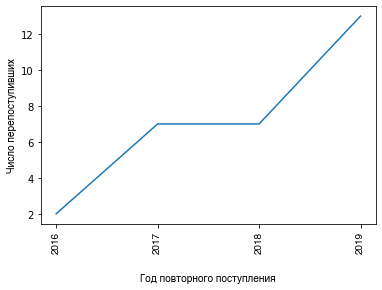

In [40]:
plt.figure()
plt.plot(lens)
plt.xticks(np.arange(4),("2016","2017","2018","2019"), rotation=90, **hfont)
plt.xlabel('Год повторного поступления',**hfont, labelpad=20)
plt.ylabel('Число перепоступивших',**hfont)
plt.savefig('re.png', dpi=300, bbox_inches="tight")

Отношение отчисленных к зачисленным:

In [41]:
dropout_sum = first_year.groupby(["enrol_year"]).sum()["dropout"].to_list()
enrolled = first_year.groupby(["enrol_year"]).count()["id"].to_list()

a=np.array(dropout_sum, dtype=np.float)
b=np.array(enrolled, dtype=np.float)
dropout_rate = a/b

dropout_sum, enrolled, dropout_rate*100

([51.0, 51.0, 43.0],
 [217, 230, 240],
 array([23.50230415, 22.17391304, 17.91666667]))

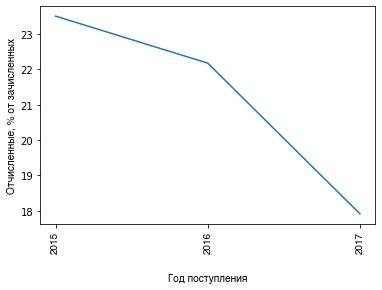

In [42]:
plt.figure()
plt.plot(dropout_rate*100)
plt.xticks(np.arange(3),("2015","2016","2017"), rotation=90, **hfont)
plt.xlabel('Год поступления', **hfont, labelpad=20)
plt.ylabel('Отчисленные, % от зачисленных',**hfont)
plt.savefig('dropout_rate.png', dpi=300, bbox_inches="tight")

Гендерный состав:

In [43]:
men = first_year.groupby(["enrol_year"]).sum()["gender"].to_list()
a=np.array(men, dtype=np.float)
b=np.array(enrolled, dtype=np.float)
#юноши, девушки
gender_count = pd.DataFrame()
gender_count["enrol_year"] = [2015,2016,2017]
gender_count["male"] = list(a*100/b)
gender_count["female"] = list(100-a*100/b)
gender_count.set_index('enrol_year',inplace=True)
gender_count

,male,female
enrol_year,,
2015,57.142857,42.857143
2016,57.391304,42.608696
2017,65.000000,35.000000


In [44]:
table = pd.DataFrame(first_year.groupby(["enrol_year","gender"]).sum()["dropout"])
table

dropout
enrol_year gender         
2015       0          22.0
           1          29.0
2016       0          21.0
           1          30.0
2017       0          12.0
           1          31.0

пересдачи по годам по предметам:

In [45]:
courses = [col for col in first_year if col.endswith('before')
              and not col.startswith('fails')|col.startswith('rank')|col.startswith('min')|col.startswith('avg')]
retakes = first_year.groupby('enrol_year')[courses].apply(lambda x: (x==0).sum())
retakes

,safety_before,history_before,lin_alg_before,calculus_1_before,economics_before,eng_before,discrete_math_before,programming_before,project_sem_before,theor_info_before,phil_before
enrol_year,,,,,,,,,,,
2015,0,5,57,110,22,42,59,57,40,6,38
2016,2,46,64,92,31,41,63,18,43,35,47
2017,0,4,73,98,20,35,87,46,34,36,32


пошли на пересдачу, % от зачисленных

In [46]:
retakes_pcnt = retakes.div(enrolled, axis = 0)
retakes_pcnt = (retakes_pcnt*100).round(2).transpose()
retakes_pcnt

enrol_year,2015,2016,2017
safety_before,0.00,0.87,0.00
history_before,2.30,20.00,1.67
lin_alg_before,26.27,27.83,30.42
calculus_1_before,50.69,40.00,40.83
economics_before,10.14,13.48,8.33
eng_before,19.35,17.83,14.58
discrete_math_before,27.19,27.39,36.25
programming_before,26.27,7.83,19.17
project_sem_before,18.43,18.70,14.17
theor_info_before,2.76,15.22,15.00


In [47]:
mean_score = (first_year.groupby('enrol_year')[courses].apply(lambda x: (x!=0).mean()).transpose()*10).round(2)
mean_score

enrol_year,2015,2016,2017
safety_before,10.00,9.91,10.00
history_before,9.77,8.00,9.83
lin_alg_before,7.37,7.22,6.96
calculus_1_before,4.93,6.00,5.92
economics_before,8.99,8.65,9.17
eng_before,8.06,8.22,8.54
discrete_math_before,7.28,7.26,6.38
programming_before,7.37,9.22,8.08
project_sem_before,8.16,8.13,8.58
theor_info_before,9.72,8.48,8.50


In [48]:
mean_score = (first_year.groupby('enrol_year')[courses].mean().transpose()).round(2)
mean_score

enrol_year,2015,2016,2017
safety_before,9.06,8.74,9.39
history_before,7.28,6.20,7.63
lin_alg_before,4.92,4.58,4.22
calculus_1_before,2.67,3.50,3.08
economics_before,5.45,5.52,5.55
eng_before,5.78,5.96,6.37
discrete_math_before,5.64,4.70,3.68
programming_before,4.66,7.09,5.15
project_sem_before,5.35,5.27,5.94
theor_info_before,7.76,6.18,5.87


In [49]:
filter_col = [col for col in first_year if col.endswith('after')
              and not col.startswith('fails')|col.startswith('rank')|col.startswith('min')|col.startswith('avg')]

corr = first_year[filter_col].corr().round(4)
corr

,safety_after,history_after,lin_alg_after,calculus_1_after,economics_after,eng_after,discrete_math_after,programming_after,project_sem_after,theor_info_after,phil_after
safety_after,1.0000,0.6261,0.5000,0.4499,0.6385,0.4735,0.4212,0.4429,0.4740,0.5203,0.4619
history_after,0.6261,1.0000,0.5197,0.6009,0.6364,0.6536,0.5675,0.4197,0.6228,0.7233,0.6669
lin_alg_after,0.5000,0.5197,1.0000,0.6888,0.7033,0.6350,0.6731,0.6978,0.6883,0.5787,0.6451
calculus_1_after,0.4499,0.6009,0.6888,1.0000,0.6659,0.5875,0.6292,0.5484,0.6242,0.6750,0.6065
economics_after,0.6385,0.6364,0.7033,0.6659,1.0000,0.6059,0.5984,0.6471,0.6144,0.6756,0.6133
eng_after,0.4735,0.6536,0.6350,0.5875,0.6059,1.0000,0.7529,0.7036,0.8570,0.7400,0.8621
discrete_math_after,0.4212,0.5675,0.6731,0.6292,0.5984,0.7529,1.0000,0.6788,0.7624,0.7518,0.7412
programming_after,0.4429,0.4197,0.6978,0.5484,0.6471,0.7036,0.6788,1.0000,0.7280,0.6069,0.7184
project_sem_after,0.4740,0.6228,0.6883,0.6242,0.6144,0.8570,0.7624,0.7280,1.0000,0.7478,0.8679
theor_info_after,0.5203,0.7233,0.5787,0.6750,0.6756,0.7400,0.7518,0.6069,0.7478,1.0000,0.7377


In [50]:
retakes = retakes.transpose()
print(retakes.to_latex(index=True, header = True, bold_rows = True))

\begin{tabular}{lrrr}
\toprule
\textbf{enrol\_year} &  2015 &  2016 &  2017 \\
\midrule
\textbf{safety\_before       } &     0 &     2 &     0 \\
\textbf{history\_before      } &     5 &    46 &     4 \\
\textbf{lin\_alg\_before      } &    57 &    64 &    73 \\
\textbf{calculus\_1\_before   } &   110 &    92 &    98 \\
\textbf{economics\_before    } &    22 &    31 &    20 \\
\textbf{eng\_before          } &    42 &    41 &    35 \\
\textbf{discrete\_math\_before} &    59 &    63 &    87 \\
\textbf{programming\_before  } &    57 &    18 &    46 \\
\textbf{project\_sem\_before  } &    40 &    43 &    34 \\
\textbf{theor\_info\_before   } &     6 &    35 &    36 \\
\textbf{phil\_before         } &    38 &    47 &    32 \\
\bottomrule
\end{tabular}



In [51]:
retakes

enrol_year,2015,2016,2017
safety_before,0,2,0
history_before,5,46,4
lin_alg_before,57,64,73
calculus_1_before,110,92,98
economics_before,22,31,20
eng_before,42,41,35
discrete_math_before,59,63,87
programming_before,57,18,46
project_sem_before,40,43,34
theor_info_before,6,35,36


In [52]:
print(retakes_pcnt.to_latex(index=True, header = True, bold_rows = True))

\begin{tabular}{lrrr}
\toprule
\textbf{enrol\_year} &   2015 &   2016 &   2017 \\
\midrule
\textbf{safety\_before       } &   0.00 &   0.87 &   0.00 \\
\textbf{history\_before      } &   2.30 &  20.00 &   1.67 \\
\textbf{lin\_alg\_before      } &  26.27 &  27.83 &  30.42 \\
\textbf{calculus\_1\_before   } &  50.69 &  40.00 &  40.83 \\
\textbf{economics\_before    } &  10.14 &  13.48 &   8.33 \\
\textbf{eng\_before          } &  19.35 &  17.83 &  14.58 \\
\textbf{discrete\_math\_before} &  27.19 &  27.39 &  36.25 \\
\textbf{programming\_before  } &  26.27 &   7.83 &  19.17 \\
\textbf{project\_sem\_before  } &  18.43 &  18.70 &  14.17 \\
\textbf{theor\_info\_before   } &   2.76 &  15.22 &  15.00 \\
\textbf{phil\_before         } &  17.51 &  20.43 &  13.33 \\
\bottomrule
\end{tabular}



In [53]:
print(corr.to_latex(index=True, header = True, bold_rows = True))

\begin{tabular}{lrrrrrrrrrrr}
\toprule
{} &  safety\_after &  history\_after &  lin\_alg\_after &  calculus\_1\_after &  economics\_after &  eng\_after &  discrete\_math\_after &  programming\_after &  project\_sem\_after &  theor\_info\_after &  phil\_after \\
\midrule
\textbf{safety\_after       } &        1.0000 &         0.6261 &         0.5000 &            0.4499 &           0.6385 &     0.4735 &               0.4212 &             0.4429 &             0.4740 &            0.5203 &      0.4619 \\
\textbf{history\_after      } &        0.6261 &         1.0000 &         0.5197 &            0.6009 &           0.6364 &     0.6536 &               0.5675 &             0.4197 &             0.6228 &            0.7233 &      0.6669 \\
\textbf{lin\_alg\_after      } &        0.5000 &         0.5197 &         1.0000 &            0.6888 &           0.7033 &     0.6350 &               0.6731 &             0.6978 &             0.6883 &            0.5787 &      0.6451 \\
\textbf{calculus\_1\_after

In [54]:
print(table.to_latex(index=True, header = True, bold_rows = True))

\begin{tabular}{llr}
\toprule
     &   &  dropout \\
\textbf{enrol\_year} & \textbf{gender} &          \\
\midrule
\textbf{2015} & \textbf{0} &     22.0 \\
     & \textbf{1} &     29.0 \\
\textbf{2016} & \textbf{0} &     21.0 \\
     & \textbf{1} &     30.0 \\
\textbf{2017} & \textbf{0} &     12.0 \\
     & \textbf{1} &     31.0 \\
\bottomrule
\end{tabular}



In [55]:
print(gender_count.to_latex(index=True, header = True, bold_rows = True))

\begin{tabular}{lrr}
\toprule
{} &       male &     female \\
\textbf{enrol\_year} &            &            \\
\midrule
\textbf{2015      } &  57.142857 &  42.857143 \\
\textbf{2016      } &  57.391304 &  42.608696 \\
\textbf{2017      } &  65.000000 &  35.000000 \\
\bottomrule
\end{tabular}



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1108dc410>,
      dtype=object)

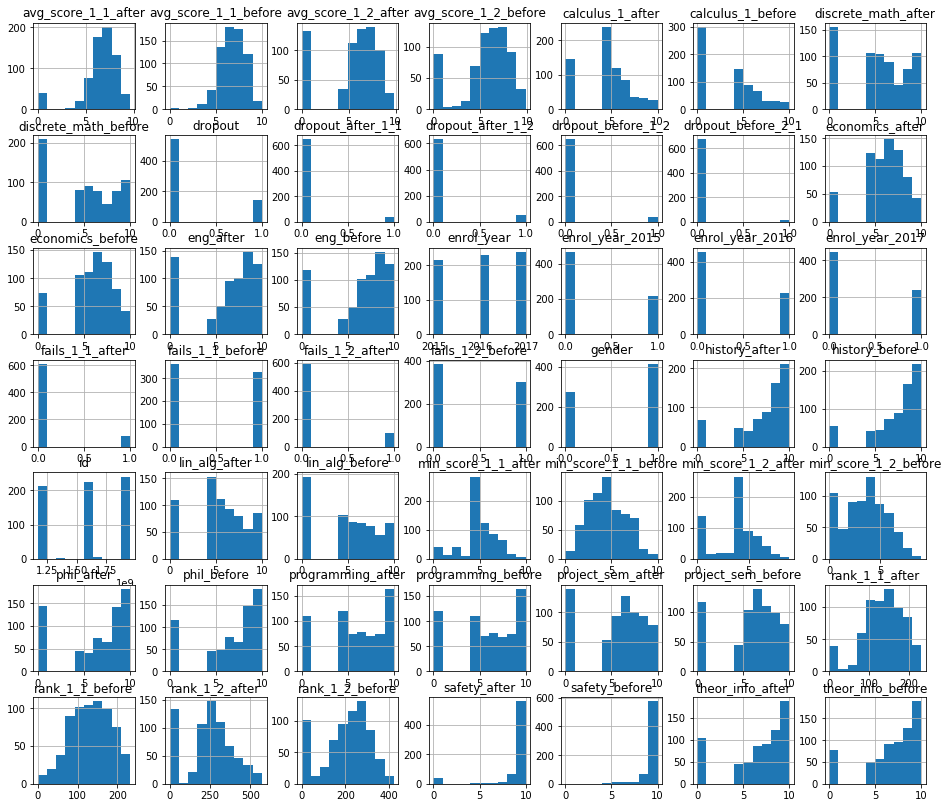

In [56]:
first_year.hist(figsize=(16,14))

# МОДЕЛИ

In [138]:
random_state = 333
test_size = 0.2

In [139]:
data = first_year.copy()

In [140]:
d1 = ["dropout_before_1_2","dropout_after_1_1"]
d2 = ["dropout_before_2_1","dropout_after_1_2"]
data["dropout_1"] = data[d1].sum(axis = 1)
data["dropout_2"] = data[d2].sum(axis = 1)

In [141]:
data.drop(["dropout_before_1_2","dropout_after_1_1","dropout_before_2_1","dropout_after_1_2"], axis=1, inplace = True)

In [142]:
# data["dropout_1"] = np.logical_xor(data["dropout_1"],1).astype(int)
# data["dropout_2"] = np.logical_xor(data["dropout_2"],1).astype(int)

In [194]:
after = ['rank_1_1_after', 'avg_score_1_1_after', 'min_score_1_1_after',
       'fails_1_1_after']
before = ['rank_1_1_before', 'avg_score_1_1_before', 'min_score_1_1_before',
       'fails_1_1_before']
#'enrol_year_2015', 'enrol_year_2016','enrol_year_2017'
features = ['gender','economics_before', 'lin_alg_before' ]+before+after
            

In [144]:
train,test = train_test_split(data, test_size = test_size, random_state=random_state)

X_train = train[features]
y_train = train['dropout_1']

X_test = test[features]
y_test = test['dropout_1']

## Logistic Regression

In [145]:
params = {'solver': ["newton-cg","liblinear"],
          'penalty' : ['l1', 'l2'],
         'class_weight':[None,{0:8,1:1},{0:10,1:1}]}

grid_search_cv = GridSearchCV(LogisticRegression(random_state=random_state), params, verbose=1, cv=3, scoring='f1')
grid_search_cv.fit(X_train, y_train)

# model = LogisticRegression(solver="liblinear",
#                           random_state = random_state,
#                       class_weight={0:8,1:1})
# model.fit(X_train,y_train)
#y_pred = model.predict(X_test)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition fo

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=333, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'class_weight': [None, {0: 8, 1: 1}, {0: 10, 1: 1}],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=1)

In [146]:
best_logit_1 = grid_search_cv.best_estimator_
best_logit_1

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=333, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [147]:
best_logit_1.coef_

array([[-1.41010303, -0.24195757, -0.23255426,  0.03148978,  0.68330769,
        -0.20701   ,  0.43449898, -0.03399569, -1.21650573,  0.53747456,
         1.90573725]])

In [148]:
y_pred = best_logit_1.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

[[117   1]
 [  7  13]]
Accuracy: 0.9420289855072463
Precision: 0.9285714285714286
Recall: 0.65


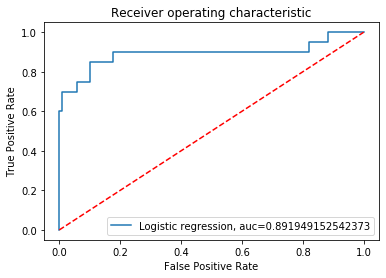

In [149]:
y_pred_proba = best_logit_1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Logistic regression, auc=" + str(auc))
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.savefig('logit_1.png', dpi=300, bbox_inches="tight")

## Decision Trees

In [150]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [5,10,20,30,40,50,100,150],
         'max_features':[None, 2,5, 'log2'],'max_depth':[1,2,None]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=random_state), params, verbose=1, cv=3, scoring='f1')
grid_search_cv.fit(X_train, y_train)

# clf = DecisionTreeClassifier(min_samples_split=100,
#                              max_depth = 6,
#                              random_state = random_state)
# dt = clf.fit(X_train, y_train)

Fitting 3 folds for each of 9408 candidates, totalling 28224 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 28224 out of 28224 | elapsed:  3.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=333,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, None],
                         'm

In [151]:
best_tree_1 = grid_search_cv.best_estimator_
best_tree_1

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=333, splitter='best')

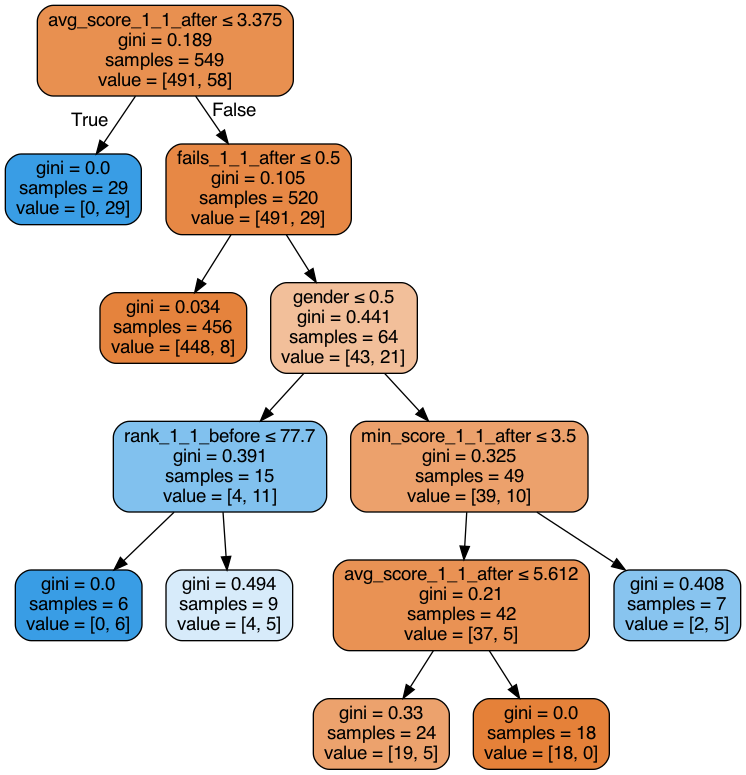

In [152]:
dot_data = StringIO()
export_graphviz(best_tree_1, feature_names = features, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [195]:
tree.export_graphviz(best_tree_1,
                     out_file="tree1.dot",
                     feature_names = features, 
                     class_names=['не отчислен','отчислен'],
                     filled = True)

https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc

In [154]:
y_pred = best_tree_1.predict(X_test)
y_pred

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [155]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[118   0]
 [  7  13]]


In [156]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 1.0
Recall: 0.65


# SVM

In [157]:
params = {'kernel': ["rbf","linear","sigmoid"],
          'gamma' : ["scale", "auto"],
         'class_weight':[None,{0:8,1:1},{0:10,1:1}]}

grid_search_cv = GridSearchCV(svm.SVC(random_state=random_state), params, verbose=1, cv=3, scoring='f1')
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:   13.5s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=333, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'class_weight': [None, {0: 8, 1: 1}, {0: 10, 1: 1}],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=1)

In [158]:
best_svm_1 =  grid_search_cv.best_estimator_
best_svm_1

SVC(C=1.0, break_ties=False, cache_size=200, class_weight={0: 8, 1: 1},
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='rbf', max_iter=-1, probability=False, random_state=333,
    shrinking=True, tol=0.001, verbose=False)

In [159]:
best_svm_1_proba = svm.SVC(C=1.0, break_ties=False, cache_size=200, class_weight={0: 8, 1: 1},
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='rbf', max_iter=-1, probability=True, random_state=333,
    shrinking=True, tol=0.001, verbose=False)

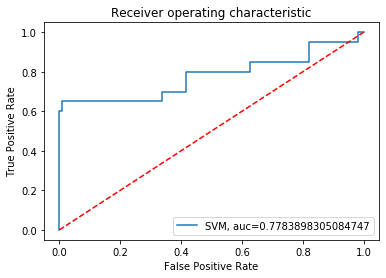

In [160]:
best_svm_1_proba.fit(X_train, y_train)
y_pred = best_svm_1_proba.predict_proba(X_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="SVM, auc=" + str(auc))
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.savefig('svm_1.png', dpi=300, bbox_inches="tight")

In [161]:
y_pred = best_svm_1.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

[[118   0]
 [  8  12]]
Precision: 1.0
Recall: 0.6


общая ROC

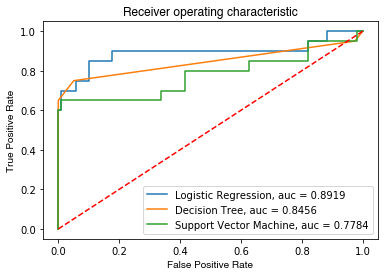

In [162]:
models1 = {best_logit_1:"Logistic Regression, auc = ",
           best_tree_1:"Decision Tree, auc = ",
           best_svm_1_proba:"Support Vector Machine, auc = "}

for model,label in models1.items():
    y_pred = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
    auc = round(metrics.roc_auc_score(y_test, y_pred),4)
    plt.plot(fpr,tpr,label=label + str(auc))
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc=4)
plt.xlabel('False Positive Rate',**hfont)
plt.ylabel('True Positive Rate',**hfont)
plt.title('Receiver operating characteristic',**hfont)
plt.savefig('roc1.png', dpi=300, bbox_inches="tight")

# МОДЕЛИ ДЛЯ КОНЦА ГОДА

исключаем выбывших в первом семестре

In [355]:
data_2 = data.copy()
data_2.drop(data_2[data_2["dropout_1"]==1].index, inplace=True)

In [356]:
broad_after = ['rank_1_2_after', 
       'fails_1_2_after']
broad_before = ['rank_1_2_before', 
        'fails_1_2_before']
sub_after = ['eng_after', 'discrete_math_after','programming_after',
        'lin_alg_after', 'calculus_1_after','economics_after']
sub_before = ['eng_before', 'discrete_math_before','programming_before',
        'lin_alg_before', 'calculus_1_before','economics_before']
#'enrol_year_2015', 'enrol_year_2016','enrol_year_2017'
features = ['gender'] + broad_before + before + after + sub_before

In [357]:
train,test = train_test_split(data_2, test_size = test_size, random_state=random_state)

X_train = train[features]
y_train = train['dropout_2']

X_test = test[features]
y_test = test['dropout_2']

# Logit

In [358]:
params = {'solver': ["newton-cg","liblinear"],
          'penalty' : ['l1', 'l2'],
         'class_weight':[None,{0:8,1:1},{0:10,1:1}]}

grid_search_cv = GridSearchCV(LogisticRegression(random_state=random_state), params, verbose=1, cv=3, scoring='f1')
grid_search_cv.fit(X_train, y_train)

# model = LogisticRegression(solver="liblinear",
#                           random_state = random_state,
#                       class_weight={0:10,1:1}
#                           )
# model.fit(X_train,y_train)
# y_pred = model.predict(X_test)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition fo

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=333, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'class_weight': [None, {0: 8, 1: 1}, {0: 10, 1: 1}],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=1)

In [359]:
best_logit_2 = grid_search_cv.best_estimator_
best_logit_2

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=333, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [360]:
best_logit_2.coef_

array([[-0.00813197, -0.0145574 ,  0.14183453, -0.00207368,  0.37349181,
         0.0273526 , -0.74864076,  0.02261772, -0.29849781,  0.23975376,
         0.38573703, -0.05936896, -0.29332625, -0.17896295, -0.02883933,
        -0.13411035, -0.15639487]])

In [361]:
y_pred = best_logit_2.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

[[110   2]
 [  0  10]]
Accuracy: 0.9836065573770492
Precision: 0.8333333333333334
Recall: 1.0


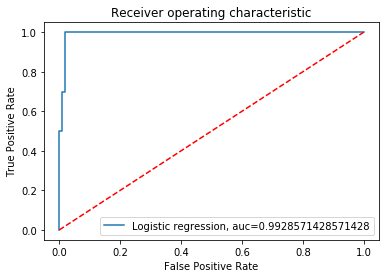

In [362]:
y_pred_proba = best_logit_2.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Logistic regression, auc=" + str(auc))
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.savefig('logit_2.png', dpi=300, bbox_inches="tight")

## Decision Trees

In [363]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [10,20,30,40,50,100],
         'max_features':[None, 2,5,10, 'log2'],'max_depth':[1,2,None]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=random_state), params, verbose=1, cv=3, scoring='f1')
grid_search_cv.fit(X_train, y_train)

# clf = DecisionTreeClassifier(min_samples_split=50,
#                              max_depth = 2,
#                              random_state = random_state)
# dt = clf.fit(X_train, y_train)

Fitting 3 folds for each of 8820 candidates, totalling 26460 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 26460 out of 26460 | elapsed:  2.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=333,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, None],
                         'm

In [364]:
best_tree_2 = grid_search_cv.best_estimator_
best_tree_2

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='log2', max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=333, splitter='best')

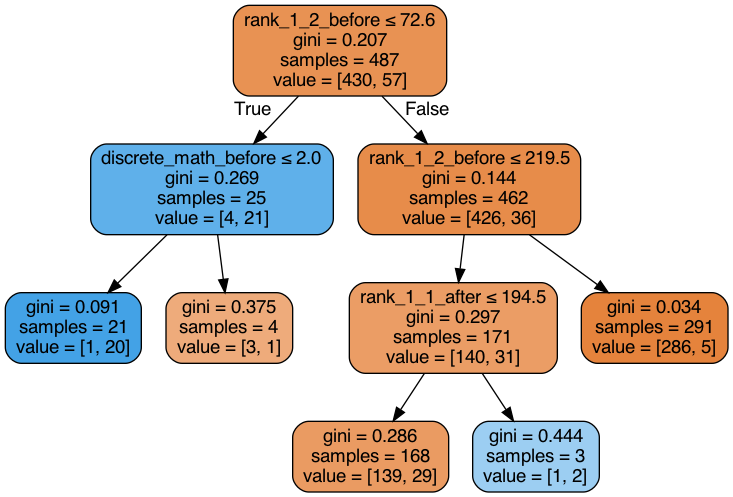

In [365]:
dot_data = StringIO()
export_graphviz(best_tree_2, feature_names = features, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [366]:
tree.export_graphviz(best_tree_2,
                     out_file="tree2.dot",
                     feature_names = features, 
                     class_names=['не отчислен','отчислен'],
                     filled = True)

In [367]:
y_pred = best_tree_2.predict(X_test)
y_pred

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0.])

In [368]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[112   0]
 [  4   6]]


In [369]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 1.0
Recall: 0.6


# SVM

In [370]:
params = {'kernel': ["rbf","linear","sigmoid"],
          'gamma' : ["scale", "auto"],
         'class_weight':[None,{0:8,1:1},{0:10,1:1}]}

grid_search_cv = GridSearchCV(svm.SVC(random_state=random_state), params, verbose=1, cv=3, scoring='f1')
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:   31.0s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=333, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'class_weight': [None, {0: 8, 1: 1}, {0: 10, 1: 1}],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=1)

In [371]:
best_svm_2 =  grid_search_cv.best_estimator_
best_svm_2

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=333, shrinking=True, tol=0.001,
    verbose=False)

In [372]:
best_svm_2_proba = svm.SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=333, shrinking=True, tol=0.001,
    verbose=False)

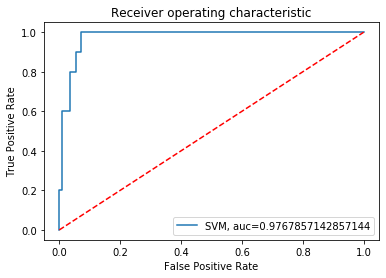

In [373]:
best_svm_2_proba.fit(X_train, y_train)
y_pred = best_svm_2_proba.predict_proba(X_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="SVM, auc=" + str(auc))
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.savefig('svm_2.png', dpi=300, bbox_inches="tight")

In [374]:
y_pred = best_svm_2.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

[[111   1]
 [  4   6]]
Precision: 0.8571428571428571
Recall: 0.6


общая ROC

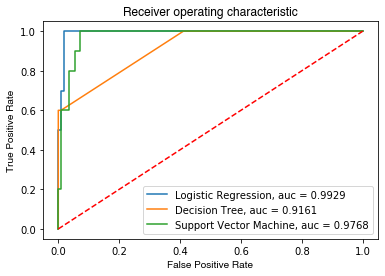

In [375]:
models2 = {best_logit_2:"Logistic Regression, auc = ",
           best_tree_2:"Decision Tree, auc = ",
           best_svm_2_proba:"Support Vector Machine, auc = "}

for model,label in models2.items():
    y_pred = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
    auc = round(metrics.roc_auc_score(y_test, y_pred),4)
    plt.plot(fpr,tpr,label=label + str(auc))
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc=4)
plt.xlabel('False Positive Rate',**hfont)
plt.ylabel('True Positive Rate',**hfont)
plt.title('Receiver operating characteristic',**hfont)
plt.savefig('roc2.png', dpi=300, bbox_inches="tight")

# ВКЛЮЧАЯ AFTER

In [437]:
data_2 = data.copy()
data_2.drop(data_2[data_2["dropout_1"]==1].index, inplace=True)

In [438]:
broad_after = ['rank_1_2_after', 
       'fails_1_2_after']
broad_before = ['rank_1_2_before', 
        'fails_1_2_before']
sub_after = ['eng_after', 'discrete_math_after','programming_after',
        'lin_alg_after', 'calculus_1_after','economics_after']
sub_before = ['eng_before', 'discrete_math_before','programming_before',
        'lin_alg_before', 'calculus_1_before','economics_before']
#'enrol_year_2015', 'enrol_year_2016','enrol_year_2017'
features = ['gender'] + broad_before + sub_before + sub_after

In [439]:
train,test = train_test_split(data_2, test_size = test_size, random_state=random_state)

X_train = train[features]
y_train = train['dropout_2']

X_test = test[features]
y_test = test['dropout_2']

# Logit

In [440]:
params = {'solver': ["newton-cg","liblinear"],
          'penalty' : ['l1', 'l2'],
         'class_weight':[None,{0:8,1:1},{0:10,1:1}]}

grid_search_cv = GridSearchCV(LogisticRegression(random_state=random_state), params, verbose=1, cv=3, scoring='f1')
grid_search_cv.fit(X_train, y_train)

# model = LogisticRegression(solver="liblinear",
#                           random_state = random_state,
#                       class_weight={0:10,1:1}
#                           )
# model.fit(X_train,y_train)
# y_pred = model.predict(X_test)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition fo

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=333, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'class_weight': [None, {0: 8, 1: 1}, {0: 10, 1: 1}],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=1)

In [441]:
best_logit_3 = grid_search_cv.best_estimator_
best_logit_3

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=333, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [442]:
best_logit_3.coef_

array([[ 0.06912639, -0.00849263,  0.62901968,  0.14902467,  0.12814372,
         0.27827416,  0.03712187,  0.2473582 , -0.2537169 , -0.55335121,
        -0.66529161, -0.36279175, -0.07993317, -0.29701734,  0.55270232]])

In [443]:
y_pred = best_logit_3.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

[[112   0]
 [  0  10]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


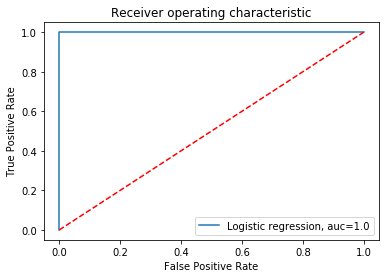

In [444]:
y_pred_proba = best_logit_3.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Logistic regression, auc=" + str(auc))
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.savefig('logit_3.png', dpi=300, bbox_inches="tight")

## Decision Trees

In [445]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [10,20,30,40,50,100],
         'max_features':[None, 2,5,10, 'log2'],'max_depth':[1,2,None]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=random_state), params, verbose=1, cv=3, scoring='f1')
grid_search_cv.fit(X_train, y_train)

# clf = DecisionTreeClassifier(min_samples_split=50,
#                              max_depth = 2,
#                              random_state = random_state)
# dt = clf.fit(X_train, y_train)

Fitting 3 folds for each of 8820 candidates, totalling 26460 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 26460 out of 26460 | elapsed:  2.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=333,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, None],
                         'm

In [446]:
best_tree_3 = grid_search_cv.best_estimator_
best_tree_3

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=5, max_leaf_nodes=6,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=333, splitter='best')

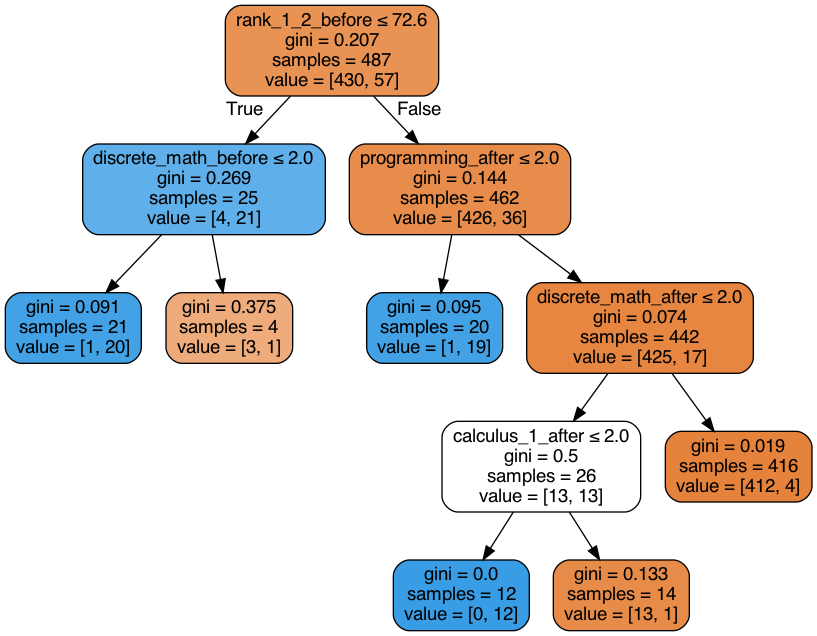

In [447]:
dot_data = StringIO()
export_graphviz(best_tree_3, feature_names = features, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [448]:
tree.export_graphviz(best_tree_3,
                     out_file="tree3.dot",
                     feature_names = features, 
                     class_names=['не отчислен','отчислен'],
                     filled = True)

In [449]:
y_pred = best_tree_3.predict(X_test)
y_pred

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0.])

In [450]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[110   2]
 [  0  10]]


In [451]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.8333333333333334
Recall: 1.0


# SVM

In [454]:
params = {'kernel': ["rbf","linear","sigmoid"],
          'gamma' : ["scale", "auto"],
         'class_weight':[None,{0:8,1:1},{0:10,1:1}]}

grid_search_cv = GridSearchCV(svm.SVC(random_state=random_state), params, verbose=1, cv=3, scoring='f1')
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    4.7s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=333, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'class_weight': [None, {0: 8, 1: 1}, {0: 10, 1: 1}],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=1)

In [455]:
best_svm_3 =  grid_search_cv.best_estimator_
best_svm_3

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=333, shrinking=True, tol=0.001,
    verbose=False)

In [456]:
best_svm_3_proba = svm.SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=333, shrinking=True, tol=0.001,
    verbose=False)

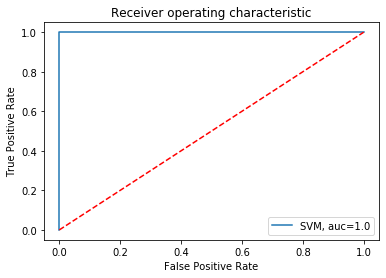

In [457]:
best_svm_3_proba.fit(X_train, y_train)
y_pred = best_svm_3_proba.predict_proba(X_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="SVM, auc=" + str(auc))
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.savefig('svm_3.png', dpi=300, bbox_inches="tight")

In [458]:
y_pred = best_svm_3.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

[[111   1]
 [  0  10]]
Precision: 0.9090909090909091
Recall: 1.0


общая ROC

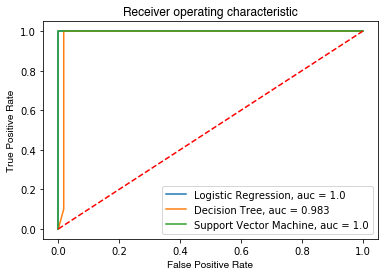

In [459]:
models3 = {best_logit_3:"Logistic Regression, auc = ",
           best_tree_3:"Decision Tree, auc = ",
           best_svm_3_proba:"Support Vector Machine, auc = "}

for model,label in models3.items():
    y_pred = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
    auc = round(metrics.roc_auc_score(y_test, y_pred),4)
    plt.plot(fpr,tpr,label=label + str(auc))
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc=4)
plt.xlabel('False Positive Rate',**hfont)
plt.ylabel('True Positive Rate',**hfont)
plt.title('Receiver operating characteristic',**hfont)
plt.savefig('roc3.png', dpi=300, bbox_inches="tight")

In [452]:
features

['gender',
 'rank_1_2_before',
 'fails_1_2_before',
 'eng_before',
 'discrete_math_before',
 'programming_before',
 'lin_alg_before',
 'calculus_1_before',
 'economics_before',
 'eng_after',
 'discrete_math_after',
 'programming_after',
 'lin_alg_after',
 'calculus_1_after',
 'economics_after']

In [453]:
str(features).replace("\'",'')

'[gender, rank_1_2_before, fails_1_2_before, eng_before, discrete_math_before, programming_before, lin_alg_before, calculus_1_before, economics_before, eng_after, discrete_math_after, programming_after, lin_alg_after, calculus_1_after, economics_after]'

In [409]:
str(best_logit_1.get_params()).replace('\'','').replace('{','')

'C: 1.0, class_weight: None, dual: False, fit_intercept: True, intercept_scaling: 1, l1_ratio: None, max_iter: 100, multi_class: auto, n_jobs: None, penalty: l2, random_state: 333, solver: newton-cg, tol: 0.0001, verbose: 0, warm_start: False}'

In [410]:
str(best_tree_1.get_params()).replace('\'','').replace('{','')

'ccp_alpha: 0.0, class_weight: None, criterion: gini, max_depth: None, max_features: None, max_leaf_nodes: 7, min_impurity_decrease: 0.0, min_impurity_split: None, min_samples_leaf: 1, min_samples_split: 10, min_weight_fraction_leaf: 0.0, presort: deprecated, random_state: 333, splitter: best}'

In [411]:
str(best_svm_1.get_params()).replace('\'','').replace('{','')

'C: 1.0, break_ties: False, cache_size: 200, class_weight: 0: 8, 1: 1}, coef0: 0.0, decision_function_shape: ovr, degree: 3, gamma: scale, kernel: rbf, max_iter: -1, probability: False, random_state: 333, shrinking: True, tol: 0.001, verbose: False}'

In [412]:
str(best_logit_2.get_params()).replace('\'','').replace('{','')

'C: 1.0, class_weight: None, dual: False, fit_intercept: True, intercept_scaling: 1, l1_ratio: None, max_iter: 100, multi_class: auto, n_jobs: None, penalty: l2, random_state: 333, solver: liblinear, tol: 0.0001, verbose: 0, warm_start: False}'

In [413]:
str(best_tree_2.get_params()).replace('\'','').replace('{','')

'ccp_alpha: 0.0, class_weight: None, criterion: gini, max_depth: None, max_features: log2, max_leaf_nodes: 5, min_impurity_decrease: 0.0, min_impurity_split: None, min_samples_leaf: 1, min_samples_split: 20, min_weight_fraction_leaf: 0.0, presort: deprecated, random_state: 333, splitter: best}'

In [414]:
str(best_svm_2.get_params()).replace('\'','').replace('{','')

'C: 1.0, break_ties: False, cache_size: 200, class_weight: None, coef0: 0.0, decision_function_shape: ovr, degree: 3, gamma: scale, kernel: rbf, max_iter: -1, probability: False, random_state: 333, shrinking: True, tol: 0.001, verbose: False}'

In [460]:
str(best_logit_3.get_params()).replace('\'','').replace('{','')

'C: 1.0, class_weight: None, dual: False, fit_intercept: True, intercept_scaling: 1, l1_ratio: None, max_iter: 100, multi_class: auto, n_jobs: None, penalty: l2, random_state: 333, solver: newton-cg, tol: 0.0001, verbose: 0, warm_start: False}'

In [461]:
str(best_tree_3.get_params()).replace('\'','').replace('{','')

'ccp_alpha: 0.0, class_weight: None, criterion: gini, max_depth: None, max_features: 5, max_leaf_nodes: 6, min_impurity_decrease: 0.0, min_impurity_split: None, min_samples_leaf: 1, min_samples_split: 10, min_weight_fraction_leaf: 0.0, presort: deprecated, random_state: 333, splitter: best}'

In [462]:
str(best_svm_3.get_params()).replace('\'','').replace('{','')

'C: 1.0, break_ties: False, cache_size: 200, class_weight: None, coef0: 0.0, decision_function_shape: ovr, degree: 3, gamma: scale, kernel: linear, max_iter: -1, probability: False, random_state: 333, shrinking: True, tol: 0.001, verbose: False}'